***A sentiment analysis job about the problems of each major U.S. airline.***

Link to the dataset from Kaggle: https://www.kaggle.com/crowdflower/twitter-airline-sentiment#Tweets.csv

We will be creating a ULMFiT model that can possibly perform sentimental analysis by classifying the tweets for the Twitter US Airline Sentiment dataset. 

Virgin America, United, Southwest, Delta, US Airways and American Airlines are the six airline companies for which the analysis will be performed. We will train the model to identify whether the tweets are positive, neutral or negative. This task would be very challenging without ULMFiT due to the size of the dataset. Since, the tweets are lesser in length we have very little information and the dataset itself is unbalanced (The number of Negative reviews is greater than the combined count of positive and neutral reviews). 

Thanks to ULMFiT for providing us with a great concept to work when we have lesser data to perform sentimental analysis.

Let's Go!



## **Importing the Libraries and the Dataset**

In [ ]:
# importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# importing the dataset
dataset = pd.read_csv("Tweets.csv")
dataset.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


## **Data Analysis & Visualization**

### **About the Dataset**

**What does these columns in the dataset represents?**
1. *tweet_id* - The id of the tweet by the customer
2. *airline_sentiment* - Whether the airline sentiment is "neutral", "positive", or "negative". It's the sentiment of the airline itself and not the tweets.
3. "*airline_sentiment_confidence*" - Confidence score of the airline.
4. "*negativereason*" - Reason is given in the form of text data only for negative review tweets
5. "*negativereason_confidence*" - The confidence score of the reason for negative review tweets
6. "*airline*" - The name of the airline
8. "*name*" - Name of the person who tweeted
10. "*retweet_count*" - The number of the reposted or forwarded tweets by other users.
11. "*text*" - The tweet by the customer
13. "*tweet_created*" - The time and date when the tweet was created
14. "*tweet_location*" - The location from when the user posted the tweet
15. "user_timezone" - The timezone from when the user posted the tweet

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

**Some insights about the dataset**
> Total Number of **Rows** in the dataset = **14640**

> Total Number of **Columns** in the dataset = **15**

> It seems that there are some missing values, Lets check that now!

### **Distribution of all the categorical variables in the Dataset**

**Let's check what are the values in each of the columns and their distribution**

In [ ]:
# Find the distribution of the variables
columns = ['airline_sentiment', 'negativereason', 'airline', 'airline_sentiment_gold', 'negativereason_gold', 'retweet_count']
columns = dataset[columns]
for temp in columns:
    print(f'---------------------------------------  {temp}  ---------------------------------------')
    print(dataset[temp].value_counts())
    print("\n")

---------------------------------------  airline_sentiment  ---------------------------------------
negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64


---------------------------------------  negativereason  ---------------------------------------
Customer Service Issue         2910
Late Flight                    1665
Can't Tell                     1190
Cancelled Flight                847
Lost Luggage                    724
Bad Flight                      580
Flight Booking Problems         529
Flight Attendant Complaints     481
longlines                       178
Damaged Luggage                  74
Name: negativereason, dtype: int64


---------------------------------------  airline  ---------------------------------------
United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2222
Virgin America     504
Name: airline, dtype: int64


---------------------------------------  airline_sentimen

### **Initial Cleaning on the Dataset**

**Deleting the  Tweet_id and name columns because it won't help us perform the analysis in any way**

In [ ]:
dataset = dataset.drop(['tweet_id', 'name'], axis = 1)

**Let's check how many NULL values are there in each of the columns**

In [ ]:
# To Check the Null values
NullValues = pd.DataFrame(dataset.isnull().sum())
NullValues.columns = ['Number of Null Values']
print(NullValues)

                              Number of Null Values
airline_sentiment                                 0
airline_sentiment_confidence                      0
negativereason                                 5462
negativereason_confidence                      4118
airline                                           0
airline_sentiment_gold                        14600
negativereason_gold                           14608
retweet_count                                     0
text                                              0
tweet_coord                                   13621
tweet_created                                     0
tweet_location                                 4733
user_timezone                                  4820


Text(0.5, 1.0, 'NULL Fields Representation')

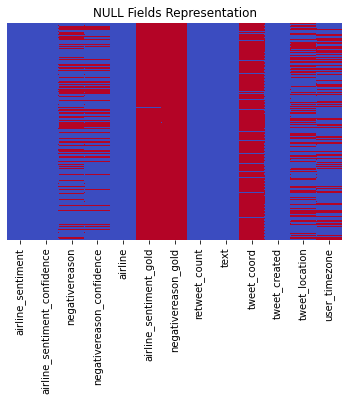

In [ ]:
# Visualize the null values 
sns.heatmap(dataset.isnull(), yticklabels=False, cbar=False, cmap="coolwarm")
plt.title("NULL Fields Representation")

**We can delete the columns "airline_sentiment_gold", "tewwt_coord" and "negativereason_gold", because more than 99% of the data they have the null values**

In [ ]:
dataset = dataset.drop(['airline_sentiment_gold', 'negativereason_gold', 'tweet_coord'], axis = 1)

**Let's remove the rows which has the white spaces in the text column**

In [ ]:
blanks = []
updatedDataSet = pd.DataFrame(dataset['text'])
for index, text in updatedDataSet.itertuples():
  if type(text)==str:
    if text.isspace():
      blanks.append(index)
print(blanks)

[]


There are no blanks in the text column. That's great! So no need to delete any rows.

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   airline_sentiment             14640 non-null  object 
 1   airline_sentiment_confidence  14640 non-null  float64
 2   negativereason                9178 non-null   object 
 3   negativereason_confidence     10522 non-null  float64
 4   airline                       14640 non-null  object 
 5   retweet_count                 14640 non-null  int64  
 6   text                          14640 non-null  object 
 7   tweet_created                 14640 non-null  object 
 8   tweet_location                9907 non-null   object 
 9   user_timezone                 9820 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 1.1+ MB


**From the above observations, it looks like the column "airline_sentiment" as the target variable**

### **Detailed Analysis**

#### **Analysis by the Different Airlines**

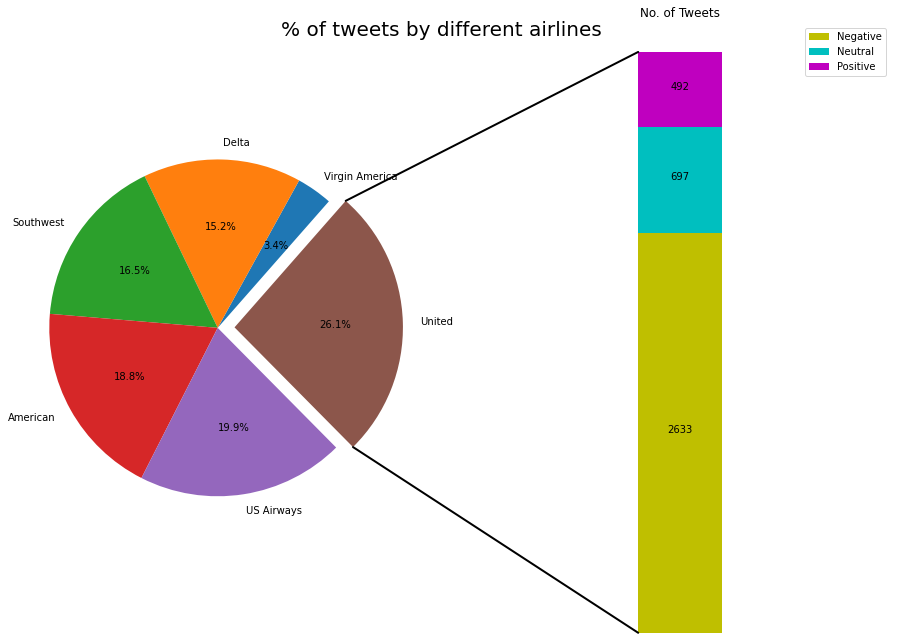

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.patches import ConnectionPatch
import numpy as np

# make figure and assign axis objects
fig = plt.figure(figsize=(13, 9.0625))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
fig.subplots_adjust(wspace=0)
fig.tight_layout()
fig.suptitle('% of tweets by different airlines', fontsize=20)


# pie chart parameters
a = (dataset[['airline', 'text']].groupby('airline').count()/len(dataset)).sort_values(by='text', ascending=True).mul(100)
ratios = a.text
labels = a.index
explode = [0, 0, 0, 0, 0, 0.1]
# rotate so that first wedge is split by the x-axis
angle = -195 * ratios[0]
ax1.pie(ratios, autopct='%1.1f%%', startangle=angle,
        labels=labels, explode=explode)

# bar chart parameters
xpos = 0
bottom = 0
b = pd.crosstab(dataset.airline,dataset.airline_sentiment)
b.iloc[4,:]
ratios = b.iloc[4,:]
width = .2
colors = ['y', 'c', 'm']

for j in range(len(ratios)):
    height = ratios[j]
    ax2.bar(xpos, height, width, bottom=bottom, color=colors[j])
    ypos = bottom + ax2.patches[j].get_height() / 2
    bottom += height
    ax2.text(xpos, ypos, (ax2.patches[j].get_height()),
             ha='center')

ax2.set_title('No. of Tweets')
ax2.legend(('Negative', 'Neutral', 'Positive'))
ax2.axis('off')
ax2.set_xlim(- 2.5 * width, 2.5 * width)

# use ConnectionPatch to draw lines between the two plots
# get the wedge data
theta1, theta2 = ax1.patches[5].theta1, ax1.patches[5].theta2
center, r = ax1.patches[5].center, ax1.patches[5].r
bar_height = sum([item.get_height() for item in ax2.patches])

# draw top connecting line
x = r * np.cos(np.pi / 180 * theta2) + center[0]
y = np.sin(np.pi / 180 * theta2) + center[1]
con = ConnectionPatch(xyA=(- width / 2, bar_height), xyB=(x, y),
                      coordsA="data", coordsB="data", axesA=ax2, axesB=ax1)
con.set_linewidth(2)
ax2.add_artist(con)

# draw bottom connecting line
x = r * np.cos(np.pi / 180 * theta1) + center[0]
y = np.sin(np.pi / 180 * theta1) + center[1]
con = ConnectionPatch(xyA=(- width / 2, 0), xyB=(x, y), coordsA="data",
                      coordsB="data", axesA=ax2, axesB=ax1)
ax2.add_artist(con)
con.set_linewidth(2)

plt.show()



> **Insights from the pie chart above**


*   From the above pie-chart we can see that a large number of tweets were for **UNITED** airlines. 
*   **Virgin** Airways has got the least number of tweets.
*   To the right side of the chart, we can find the number of tweets posted for the United airlines.
*   There were a lot of negative sentiment tweets. Its **4x** times the tweets which has a sentiment of neutral and **5x** times the tweets which has a sentiment of positive.


In [ ]:
airline_sentiment_distribution = pd.crosstab(dataset.airline,dataset.airline_sentiment)
#airline_sentiment_distribution

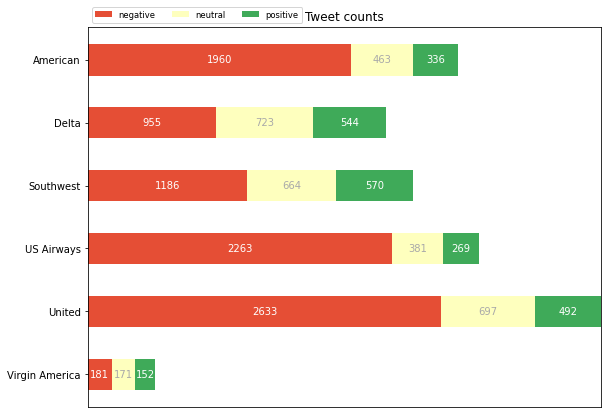

In [ ]:
category_names = b.columns
# values obtained from airline_sentiment_distribution - Check the cell above
results = {
    'American': [1960,463,336],
    'Delta': [955,723,544],
    'Southwest': [1186,664,570],
    'US Airways': [2263, 381, 269],
    'United': [2633,697,492],
    'Virgin America': [181,171,152]
}


def survey(results, category_names):
    labels = list(results.keys())
    data = np.array(list(results.values()))
    data_cum = data.cumsum(axis=1)
    category_colors = plt.get_cmap('RdYlGn')(
        np.linspace(0.15, 0.85, data.shape[1]))

    fig, ax = plt.subplots(figsize=(9.2, 7))
    ax.invert_yaxis()
    ax.xaxis.set_visible(False)
    ax.set_xlim(0, np.sum(data, axis=1).max())

    for i, (colname, color) in enumerate(zip(category_names, category_colors)):
        widths = data[:, i]
        starts = data_cum[:, i] - widths
        ax.barh(labels, widths, left=starts, height=0.5,
                label=colname, color=color)
        xcenters = starts + widths / 2

        r, g, b, _ = color
        text_color = 'white' if r * g * b < 0.5 else 'darkgrey'
        for y, (x, c) in enumerate(zip(xcenters, widths)):
            ax.text(x, y, str(int(c)), ha='center', va='center',
                    color=text_color)
    ax.legend(ncol=len(category_names), bbox_to_anchor=(0, 1),
              loc='lower left', fontsize='small')

    return fig, ax
survey(results, category_names)
plt.title("Tweet counts")
plt.show()

**As you can see in the chart above,**

*   For all the airlines, the number of negative tweets are higher
*   Virgin america's distribution of tweets WRT sentiments differ only by a minuscle difference. We can say that **virgin america**, **delta** and **Southwest** are comparitavely performing well when compared to the other three airlines
*   **US airways** are definately one of the airlines which needs a lot of improvement. This is because, their ratio of negative sentiment tweets are huge when compared to others 
*   From the graph above, **Virgin America** seems to be very good and had been getting positive feedbacks, while **United** is having the most negative feedbacks.

#### **Analysis by the Retweet count**

*This analysis is performed because, there may be tweets which other people wouldn't have expressed but wants to express to some others review. This is considered an important aspect because all the retweets are again considered as a new tweet by a different individual*

First, removing all the rows which has a retweet count of 0, because it doesn't add any value.

In [ ]:
value_counts = dataset['retweet_count'].value_counts()
to_remove = value_counts[value_counts.index == 0].index
df = dataset[~dataset.retweet_count.isin(to_remove)]
#df['retweet_count'].value_counts()

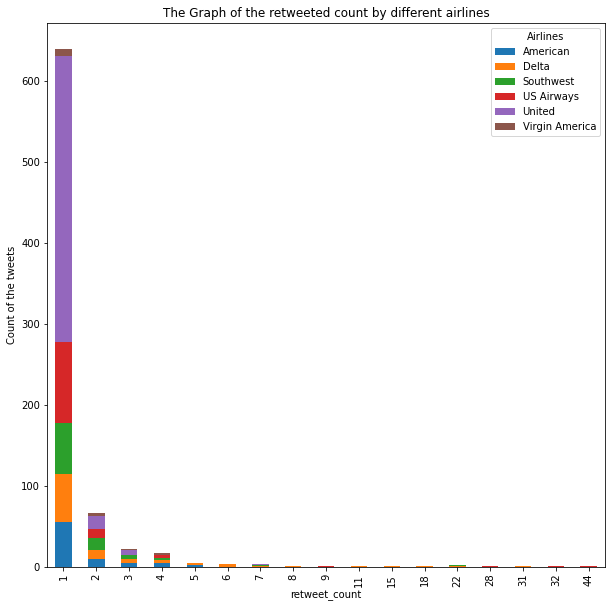

In [ ]:
ct = pd.crosstab(df.retweet_count, df.airline)
ct.plot.bar(stacked=True, figsize = (10,10))
plt.ylabel("Count of the tweets")
plt.title("The Graph of the retweeted count by different airlines")
plt.legend(title='Airlines')
plt.show()

**Retweet count WRT Sentiment**

In [ ]:
retweets = pd.crosstab(df.retweet_count, df.airline_sentiment, margins=True)
retweets

airline_sentiment,negative,neutral,positive,All
retweet_count,,,,
1,524,63,53,640
2,41,16,9,66
3,12,7,3,22
4,11,2,4,17
5,2,2,1,5
6,0,2,1,3
7,2,0,1,3
8,0,0,1,1
9,0,0,1,1


In [ ]:
dataset['airline_sentiment'].value_counts()

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64

In [ ]:
!pip install squarify #algorithm for treemap

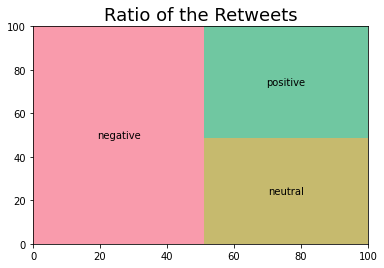

In [ ]:
import squarify
squarify.plot(sizes=[597/9148, 94/3099, 76/2363], label = ['negative', 'neutral', 'positive'], alpha=.7, color=sns.color_palette("husl",5))
plt.title("Ratio of the Retweets", fontsize=18)
plt.show()



> The ratio of the retweets. There were a lot of retweets for the negative sentiment review when compared to the positive and neutral sentiment. The number of retweets for the positive and neutral sentiments were approximately equal.



#### **Analysis by the Reason for the Negative Reviews**

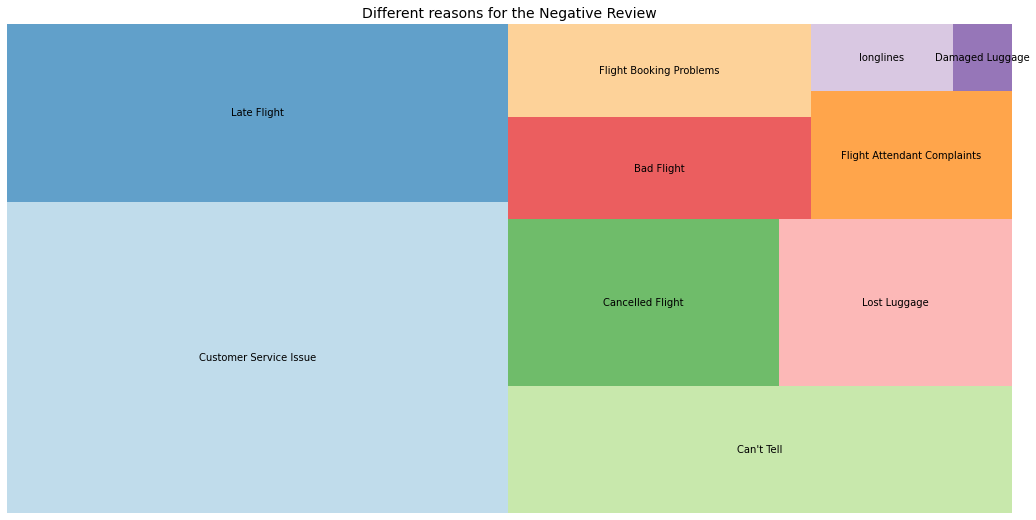

In [ ]:
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(18, 9)
temp = dataset['negativereason'].value_counts()
squarify.plot(sizes=temp.values, label=temp.index, alpha=.7, color=sns.color_palette("Paired"))
plt.axis('off')
plt.title("Different reasons for the Negative Review", fontsize=14)
plt.show()



> **Insights:** 

1.   The reasons for the negative sentiment are shown in the chart above.
2.   As the sizes of the box represents, "Customer service issue" is one of the major reason for negative reviews."
3.   "Late flight" seconds the table
4.   There are also 8 other reasons for the negative reviews

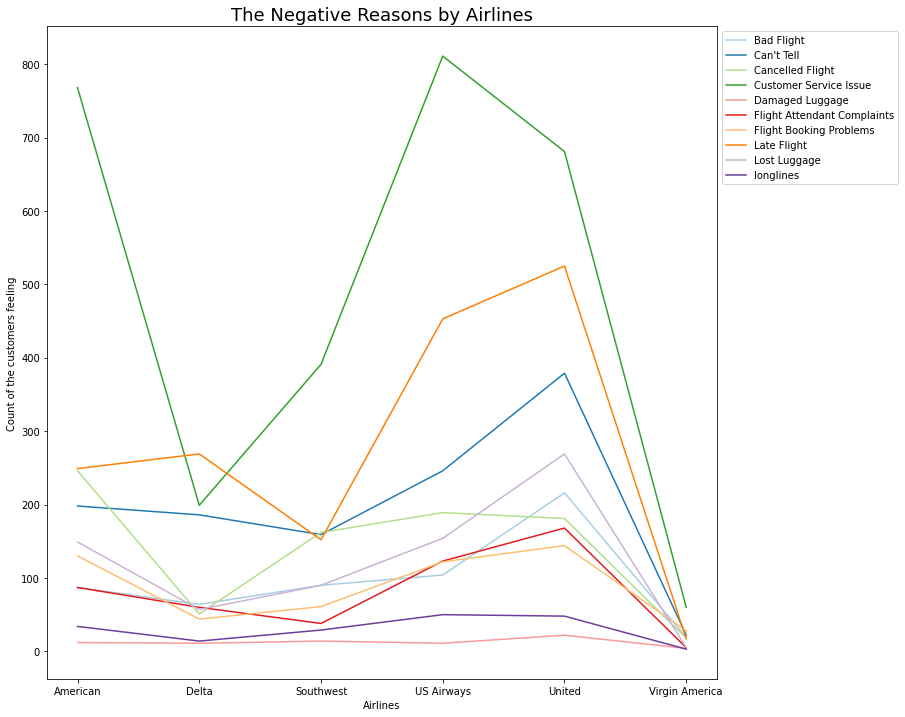

In [ ]:
pd.crosstab(dataset.airline, dataset.negativereason).plot(color=sns.color_palette("Paired"),figsize=(12,12))
plt.title('The Negative Reasons by Airlines', fontsize=18)
plt.xlabel('Airlines')
plt.ylabel('Count of the customers feeling')
plt.legend(bbox_to_anchor=(1, 1), loc=2)



> **Insights:** 

1.   "customer service issue" has been **major (Top most)** problem for all the airlines except delta.
2.   All the airlines negative reasons follow the same pattern as seen in the previois graph. Henceforth, the airlines needs to look into the major reason like "customer service issue", "late flight" to improve their standards

#### **Analysis by the length of the Text**

**Adding two new columns to denote the number of letters and words in the text column.**

Using FacetGrid from the seaborn library to create a grid of 3 histograms of text length based off of the sentiment analysis

In [ ]:
dataset['text length'] = dataset['text'].apply(len)

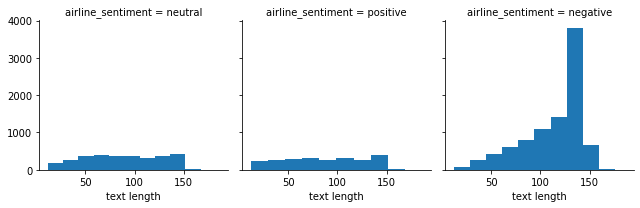

In [ ]:
g = sns.FacetGrid(dataset,col='airline_sentiment')
g.map(plt.hist,'text length')

**Insights from the Graphs above:**

*   Most of the reviews has a text length between 130 to 140 in all the 3 categories. 
*   For Neutral and positive sentiments, the distribution of the reviews are almost the same irrespective of the text length. 
*   In contrast, when the airline sentiment is negative, as the length of the text increases, the count of the negative sentiment increases exponentially till text length is equal to 140.
*   We can say that most of the tweets are negative when the length of the text is around 140.







In [ ]:
dataset['words count'] = dataset['text'].str.split().apply(len)

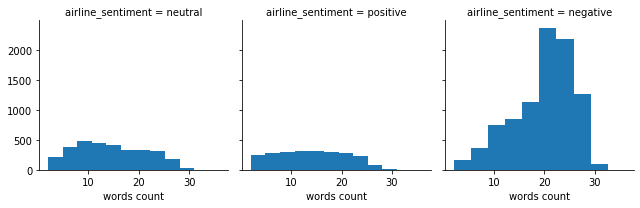

In [ ]:
g = sns.FacetGrid(dataset,col='airline_sentiment')
g.map(plt.hist,'words count')

**Insights from the Graphs above:**

*   This again proves that as the number of words increases, they mostly belong to the negative sentiment category   

**A box plot of the words count for each of the sentiment**

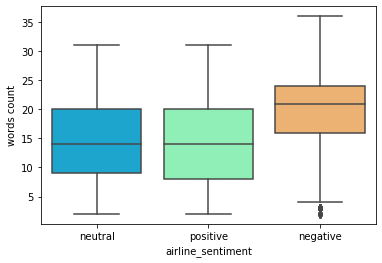

In [ ]:
sns.boxplot(x='airline_sentiment',y='words count',data=dataset,palette='rainbow')

In [ ]:
tempData = dataset[['text length', 'airline_sentiment', 'words count']]
sentiment = tempData.groupby('airline_sentiment').mean()
sentiment

,text length,words count
airline_sentiment,,
negative,113.947919,19.686206
neutral,87.359471,14.408842
positive,86.082945,14.013119


*From the above results, we can say that the negative sentiment tweets are longer than the length of the positive and neutral tweets.*

### **Distribution of the Target Variable**

**Lets check the distribution of the target column - "airline_sentiment"**

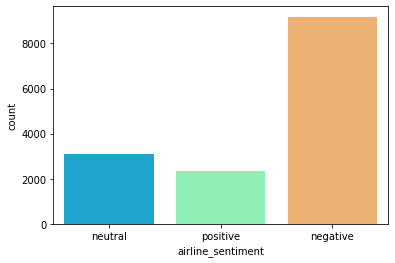

In [ ]:
# Visualize the target variable distribution
sns.countplot(x='airline_sentiment',data=dataset,palette='rainbow')

**Insights about the target variable**

> negative  -  **9178**        
        
> neutral   -  **3099**

> positive  -  **2363**

*This confirms that the tweets which has a negative sentiment is lot when compared to the combined sentiment of positive and negative sentiments*





## **Implementation**

### **Preprocessing the Target Variable**

> **Driver Variable:** "text"

> **Target Variable:** "airline_sentiment"

In [ ]:
print(dataset['airline_sentiment'])

0         neutral
1        positive
2         neutral
3        negative
4        negative
           ...   
14635    positive
14636    negative
14637     neutral
14638    negative
14639     neutral
Name: airline_sentiment, Length: 14640, dtype: object


In [ ]:
y = dataset['airline_sentiment'].values
print(y.shape)

(14640,)


In [ ]:
# Convert the target column into categoriacal values
#dataset['airline_sentiment'].replace(to_replace = 'neutral' , value = 0,inplace = True)
#dataset['airline_sentiment'].replace(to_replace = 'positive' , value = 1,inplace = True)
#dataset['airline_sentiment'].replace(to_replace = 'negative' , value = 2,inplace = True)

In [ ]:
# Using Label Encoder to convert the target column into numerical values
from sklearn.preprocessing import LabelEncoder
labelencoder_y = LabelEncoder()
y = labelencoder_y.fit_transform(y)

In [ ]:
y

array([1, 2, 1, ..., 1, 0, 1])

In [ ]:
dataset['Target Value'] = y

*The target column is now converted into numerical values and their representation are shown below*

In [ ]:
dataset[['airline_sentiment', 'Target Value']]

,airline_sentiment,Target Value
0,neutral,1
1,positive,2
2,neutral,1
3,negative,0
4,negative,0
...,...,...
14635,positive,2
14636,negative,0
14637,neutral,1
14638,negative,0


### **Cleaning the text**

**Now, Let's clean the text column**

Using NLTK library removing the stemming, stop words and removing the punctuations.

In [ ]:
#!pip install spacy
#!pip3 install https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-2.2.0/en_core_web_sm-2.2.0.tar.gz
#!python -m spacy download en_core_web_lg

In [ ]:
# importing the libraries for cleaning the text
import re
import nltk
import spacy.cli
nltk.download('stopwords')
spacy.cli.download("en_core_web_lg")
import en_core_web_lg
nlp = en_core_web_lg.load()
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import RegexpTokenizer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_lg')


Including the stop words from both the spacy and nltk library

In [ ]:
stop_words_nltk = stopwords.words('english')
stop_words_spacy = nlp.Defaults.stop_words
full_set_of_stopwords = stop_words_spacy.union(stop_words_nltk)

In [ ]:
def cleanTheText(text):
  corpus = []
  for i in text:

    # This is to remove the username
    pattern_for_userid = '@[A-Za-z0-9]+'

    # This is to remove the links of any websites
    pattern_for_url = 'https?://[^ ]+'
    pattern_for_link = 'www.[^ ]+'

    # Combining all the patters to be removed in the text
    final_pattern = '|'.join((pattern_for_userid, pattern_for_url, pattern_for_link))
    
    # NLTK
    # removes the person's username, links of any websites
    data = re.sub(final_pattern, ' ', i)

    # removes the punctuation, smilies
    tokenizer = RegexpTokenizer(r'\w+')
    data = tokenizer.tokenize(data)
    data = ' '.join(data)
    data = data.lower()

    # Stop word removal and stemming
    #data = data.split()
    #ps = PorterStemmer()
    #data = [ps.stem(temp) for temp in data if not temp in set(full_set_of_stopwords)]
    #data = ' '.join(data)

    # removes the digits in the text
    data = ''.join([i for i in data if not i.isdigit()])

    # Spacy
    #tokenizer = RegexpTokenizer(r'\w+')
    #data = re.sub(final_pattern, ' ', i)
    #data = nlp(data)
    #data = [word.lemma_ for word in data if not word.text in set(full_set_of_stopwords)]
    #data = ' '.join(data)
    #data = tokenizer.tokenize(data)
    #data = ' '.join(data)
    #data = data.lower()

    corpus.append(data)

  return corpus

*Note: When applying the stemming/stop words/lemmatization, the accuracy score went down.*

### **Top Words in Negative and Positive Category**

*This is to display the top words in the negative and positive category. This is done by the concept of topic modelling using Non-negative Matrix Factorization.*

Using **TfidfVectorizer** to convert to sparse matrix

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')
dtm = tfidf.fit_transform(cleanTheText(dataset['text']))

*Implementing **Non-negative** Matrix Factorization*

In [ ]:
from sklearn.decomposition import NMF
nmf_model = NMF(n_components=2,random_state=42)
nmf_model.fit(dtm)

NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=2, random_state=42, shuffle=False, solver='cd', tol=0.0001,
    verbose=0)

Checking the **top words** in each category

In [ ]:
for index,category in enumerate(nmf_model.components_):
    print(f'THE top 25 words in category #{index}')
    print([tfidf.get_feature_names()[i] for i in category.argsort()[-25:]])
    print('\n')

THE top 25 words in category #0
['waiting', 'gate', 'got', 'today', 'tomorrow', 'amp', 've', 'flighted', 'plane', 'hour', 'need', 'customer', 'flights', 'late', 'time', 'service', 'just', 'delayed', 'hours', 'hold', 'help', 'thank', 'flightled', 'cancelled', 'flight']


THE top 25 words in category #1
['making', 'quick', 'know', 'care', 'appreciate', 'yes', 'getting', 'follow', 'did', 'll', 'ok', 'help', 'customer', 'service', 'guys', 'reply', 'sent', 'good', 'response', 'just', 'awesome', 'dm', 'got', 'great', 'thanks']




From the results above it seems that category 0 belongs to **Negative** and category 1 belongs to **Positive**. Let's check that in visual representation.

**Top words in Negative Category**

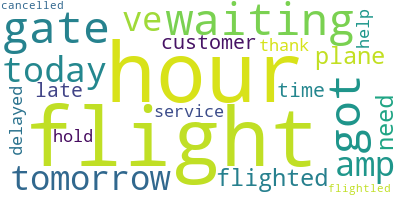

In [ ]:
# Import the wordcloud library
from wordcloud import WordCloud

long_string_negative = ','.join(['waiting', 'gate', 'got', 'today', 'tomorrow', 'amp', 've', 'flighted', 'plane', 'hour', 
                        'need', 'customer', 'flights', 'late', 'time', 'service', 
                        'just', 'delayed', 'hours', 'hold', 'help', 'thank', 'flightled', 'cancelled', 'flight'])

# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')

# Generate a word cloud
wordcloud.generate(long_string_negative)

# Visualize the word cloud
wordcloud.to_image()


**Top words in Positive Category**

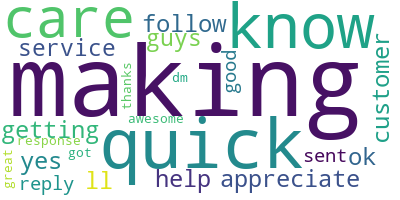

In [ ]:
# Import the wordcloud library
from wordcloud import WordCloud

#for index,topic in enumerate(nmf_model.components_):
long_string_positive = ','.join(['making', 'quick', 'know', 'care', 'appreciate', 'yes', 'getting', 'follow', 'did', 'll', 'ok', 'help', 'customer', 'service', 
                        'guys', 'reply', 'sent', 'good', 'response', 'just', 'awesome', 'dm', 'got', 'great', 'thanks'])

# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')

# Generate a word cloud
wordcloud.generate(long_string_positive)

# Visualize the word cloud
wordcloud.to_image()

### **Models - Pipeline**

In [ ]:
dataset['updated_text'] = pd.DataFrame(cleanTheText(dataset['text']))

Comparing the text data before and after "cleaning"

In [ ]:
dataset[['text', 'updated_text']]

,text,updated_text
0,@VirginAmerica What @dhepburn said.,what said
1,@VirginAmerica plus you've added commercials t...,plus you ve added commercials to the experienc...
2,@VirginAmerica I didn't today... Must mean I n...,i didn t today must mean i need to take anothe...
3,@VirginAmerica it's really aggressive to blast...,it s really aggressive to blast obnoxious ente...
4,@VirginAmerica and it's a really big bad thing...,and it s a really big bad thing about it
...,...,...
14635,@AmericanAir thank you we got on a different f...,thank you we got on a different flight to chicago
14636,@AmericanAir leaving over 20 minutes Late Flig...,leaving over minutes late flight no warnings ...
14637,@AmericanAir Please bring American Airlines to...,please bring american airlines to blackberry
14638,"@AmericanAir you have my money, you change my ...",you have my money you change my flight and don...


Identifying the empty strings after cleaning and droping the respective rows

In [ ]:
blanks = []
for index, text in pd.DataFrame(dataset['updated_text']).itertuples():
  if type(text)==str:
    if len(text)==0:
      blanks.append(index)
print(len(blanks))

0


In [ ]:
dataset.drop(blanks, inplace=True)

**Splitting the dataset into train and test set**

Assigning the X and y values

In [ ]:
X = dataset['updated_text'].values
y = dataset['Target Value'].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0, stratify = y)

CountVectorizer to tokenize, and have tf-idf for the matrix.

Analysis were performed for Logistic Regression and Random Forest, and got the best results for Logistic regression.


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

pipeline = Pipeline([
              ("countvectorizer", CountVectorizer()),
              ("tf-idf", TfidfTransformer()),
              ("Logistic Regression", LogisticRegression(max_iter=200, random_state = 0))
              #("Random Forest Classifier", RandomForestClassifier(n_estimators = 100))      
])

**Building the model**

In [ ]:
pipeline.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('countvectorizer',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, voc...
                ('tf-idf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('Logistic Regression',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, interce

**Predict the test set results**

In [ ]:
y_pred = pipeline.predict(X_test)
print(np.concatenate((y_test.reshape(len(y_test), 1), y_pred.reshape(len(y_pred), 1)), 1))

[[0 0]
 [0 0]
 [2 2]
 ...
 [0 0]
 [0 0]
 [2 0]]


Check the comparison of the actual and predicted value above.

**Making the confusion Matrix**

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1737   75   24]
 [ 264  317   39]
 [ 126   61  285]]



> **Neutral** - 1

> **Positive** - 2

> **Negative** - 0


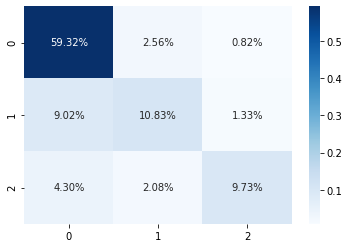

In [ ]:
sns.heatmap(cm/np.sum(cm), annot=True, fmt='.2%', cmap='Blues')

In [ ]:
#classification Report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.95      0.88      1836
           1       0.70      0.51      0.59       620
           2       0.82      0.60      0.70       472

    accuracy                           0.80      2928
   macro avg       0.78      0.69      0.72      2928
weighted avg       0.79      0.80      0.79      2928



*The best till now is with logistic regression with an accuracy score of 80%*

### **By Vadar Method**

Computing based on the polarity scores.

In [ ]:
import nltk
nltk.download("vader_lexicon")

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

/usr/local/lib/python3.6/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


***Computing the positive, negative, neutral, compound scores for each tweet.***

In [ ]:
dataset['Sentiments'] = dataset['text'].apply(lambda review: sid.polarity_scores(review))
dataset['Positive Score'] = dataset['Sentiments'].apply(lambda positive: positive['pos'])
dataset['Negative Score'] = dataset['Sentiments'].apply(lambda negative: negative['neg'])
dataset['Neutral Score'] = dataset['Sentiments'].apply(lambda neutral: neutral['neu'])
dataset['Compound'] = dataset['Sentiments'].apply(lambda compound: compound['compound'])

dataset  = dataset.drop(['airline_sentiment_confidence',	'negativereason',	'negativereason_confidence',	'airline',	
                                        'retweet_count', 'tweet_created',	'tweet_location',	'user_timezone',	
                                        'Sentiments'], axis = 1)

dataset.head(10)

,airline_sentiment,text,text length,words count,Target Value,updated_text,Positive Score,Negative Score,Neutral Score,Compound
0,neutral,@VirginAmerica What @dhepburn said.,35,4,1,what said,0.000,0.000,1.000,0.0000
1,positive,@VirginAmerica plus you've added commercials t...,72,9,2,plus you ve added commercials to the experienc...,0.000,0.000,1.000,0.0000
2,neutral,@VirginAmerica I didn't today... Must mean I n...,71,12,1,i didn t today must mean i need to take anothe...,0.000,0.000,1.000,0.0000
3,negative,@VirginAmerica it's really aggressive to blast...,126,17,0,it s really aggressive to blast obnoxious ente...,0.000,0.246,0.754,-0.5984
4,negative,@VirginAmerica and it's a really big bad thing...,55,10,0,and it s a really big bad thing about it,0.000,0.321,0.679,-0.5829
5,negative,@VirginAmerica seriously would pay $30 a fligh...,135,23,0,seriously would pay a flight for seats that d...,0.074,0.256,0.670,-0.5945
6,positive,"@VirginAmerica yes, nearly every time I fly VX...",79,15,2,yes nearly every time i fly vx this ear worm w...,0.322,0.000,0.678,0.6908
7,neutral,@VirginAmerica Really missed a prime opportuni...,108,13,1,really missed a prime opportunity for men with...,0.197,0.160,0.643,0.1458
8,positive,"@virginamerica Well, I didn't…but NOW I DO! :-D",47,8,2,well i didn t but now i do d,0.218,0.367,0.415,-0.3477
9,positive,"@VirginAmerica it was amazing, and arrived an ...",80,14,2,it was amazing and arrived an hour early you r...,0.358,0.000,0.642,0.7717


**Now, lets build a model based on the sentiment scores we have obtained.**


In [ ]:
X_vadar = dataset.iloc[:, 6:10].values
y_vadar = y
print(X_vadar.shape)
print(y.shape)

(14640, 4)
(14640,)


**Splitting the dataset into train and test set**

In [ ]:
from sklearn.model_selection import train_test_split
X_train_vadar, X_test_vadar, y_train_vadar, y_test_vadar = train_test_split(X_vadar, y_vadar, test_size = 0.2, random_state = 0, stratify = y_vadar)

**Building the model**

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier_vadar = LogisticRegression(max_iter=500, random_state=0)
classifier_vadar.fit(X_train_vadar, y_train_vadar)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

**Predicting the test results**

In [ ]:
y_pred_vadar = classifier_vadar.predict(X_test_vadar)
print(np.concatenate((y_test_vadar.reshape(len(y_test_vadar), 1), y_pred_vadar.reshape(len(y_pred_vadar), 1)), 1))

[[0 0]
 [0 0]
 [2 2]
 ...
 [0 0]
 [0 0]
 [2 0]]


**Making the confusion matrix**

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
cm_vadar = confusion_matrix(y_test_vadar, y_pred_vadar)
print(cm_vadar)

[[1758    3   75]
 [ 534    3   83]
 [ 191    2  279]]


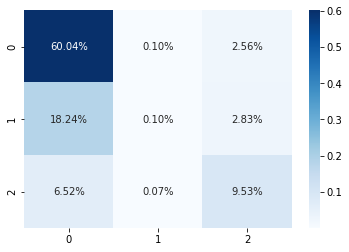

In [ ]:
sns.heatmap(cm_vadar/np.sum(cm_vadar), annot=True, fmt='.2%', cmap='Blues')

In [ ]:
# classification report
print(classification_report(y_test_vadar, y_pred_vadar))

              precision    recall  f1-score   support

           0       0.71      0.96      0.81      1836
           1       0.38      0.00      0.01       620
           2       0.64      0.59      0.61       472

    accuracy                           0.70      2928
   macro avg       0.57      0.52      0.48      2928
weighted avg       0.63      0.70      0.61      2928




> **Neutral** - 1

> **Positive** - 2

> **Negative** - 0


***Result: This method seems to be wrong, as you could see the model doesn't predict the "neutral" case well. Check the precision, recall and f1-score for the 1 value : neutral***

Accuracy Score = 70%

Now, let's try by simply comparing the compound score and the target value

In [ ]:
dataset.head()

,airline_sentiment,text,text length,words count,Target Value,updated_text,Positive Score,Negative Score,Neutral Score,Compound
0,neutral,@VirginAmerica What @dhepburn said.,35,4,1,what said,0.0,0.000,1.000,0.0000
1,positive,@VirginAmerica plus you've added commercials t...,72,9,2,plus you ve added commercials to the experienc...,0.0,0.000,1.000,0.0000
2,neutral,@VirginAmerica I didn't today... Must mean I n...,71,12,1,i didn t today must mean i need to take anothe...,0.0,0.000,1.000,0.0000
3,negative,@VirginAmerica it's really aggressive to blast...,126,17,0,it s really aggressive to blast obnoxious ente...,0.0,0.246,0.754,-0.5984
4,negative,@VirginAmerica and it's a really big bad thing...,55,10,0,and it s a really big bad thing about it,0.0,0.321,0.679,-0.5829


In [ ]:
dataset['Target Value based on Polarity Scores'] = dataset['Compound'].apply(lambda value: 'neutral' if value == 0 else ('positive' if value > 0 else 'negative'))

In [ ]:
dataset.head()

,airline_sentiment,text,text length,words count,Target Value,updated_text,Positive Score,Negative Score,Neutral Score,Compound,Target Value based on Polarity Scores
0,neutral,@VirginAmerica What @dhepburn said.,35,4,1,what said,0.0,0.000,1.000,0.0000,neutral
1,positive,@VirginAmerica plus you've added commercials t...,72,9,2,plus you ve added commercials to the experienc...,0.0,0.000,1.000,0.0000,neutral
2,neutral,@VirginAmerica I didn't today... Must mean I n...,71,12,1,i didn t today must mean i need to take anothe...,0.0,0.000,1.000,0.0000,neutral
3,negative,@VirginAmerica it's really aggressive to blast...,126,17,0,it s really aggressive to blast obnoxious ente...,0.0,0.246,0.754,-0.5984,negative
4,negative,@VirginAmerica and it's a really big bad thing...,55,10,0,and it s a really big bad thing about it,0.0,0.321,0.679,-0.5829,negative


*Just Comparing the airline_sentiment Column with the Target Value Column, to find how good does the sentiment Intensity Analyser predicts the sentiment*

**Making the confusion Matrix**

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
cm_vadar_1 = confusion_matrix(dataset['airline_sentiment'], dataset['Target Value based on Polarity Scores'])
print(cm_vadar_1)

[[4627 1751 2800]
 [ 433 1309 1357]
 [  93  205 2065]]


In [ ]:
print(classification_report(dataset['airline_sentiment'], dataset['Target Value based on Polarity Scores']))

              precision    recall  f1-score   support

    negative       0.90      0.50      0.65      9178
     neutral       0.40      0.42      0.41      3099
    positive       0.33      0.87      0.48      2363

    accuracy                           0.55     14640
   macro avg       0.54      0.60      0.51     14640
weighted avg       0.70      0.55      0.57     14640



**From the above results we could see that the accuracy score went down when compared to the past. Now, Let's implement the ULMFiT model and check the results**

Accuracy Score = 55%

## **ULMFiT Implementation**

We have the updated clean text. Now, we have to perform the "Language model Fine Tuning"

In [ ]:
dataset.head()

,airline_sentiment,text,text length,words count,Target Value,updated_text,Positive Score,Negative Score,Neutral Score,Compound,Target Value based on Polarity Scores
0,neutral,@VirginAmerica What @dhepburn said.,35,4,1,what said,0.0,0.000,1.000,0.0000,neutral
1,positive,@VirginAmerica plus you've added commercials t...,72,9,2,plus you ve added commercials to the experienc...,0.0,0.000,1.000,0.0000,neutral
2,neutral,@VirginAmerica I didn't today... Must mean I n...,71,12,1,i didn t today must mean i need to take anothe...,0.0,0.000,1.000,0.0000,neutral
3,negative,@VirginAmerica it's really aggressive to blast...,126,17,0,it s really aggressive to blast obnoxious ente...,0.0,0.246,0.754,-0.5984,negative
4,negative,@VirginAmerica and it's a really big bad thing...,55,10,0,and it s a really big bad thing about it,0.0,0.321,0.679,-0.5829,negative


Importing the fast.ai libraries

In [ ]:
from fastai import *
from fastai.text import *

Since we need only two columns, extracting only those specific columns

In [ ]:
dataset_ulmfit = pd.DataFrame(dataset[['airline_sentiment', 'updated_text']])
dataset_ulmfit.head()

,airline_sentiment,updated_text
0,neutral,what said
1,positive,plus you ve added commercials to the experienc...
2,neutral,i didn t today must mean i need to take anothe...
3,negative,it s really aggressive to blast obnoxious ente...
4,negative,and it s a really big bad thing about it


Mentioning the path where the dataset is present.

In [ ]:
path = "/content"
path

'/content'



> **Two Major Steps**
1. To prepare the data for the language model
2. To prepare the data for the classification model



Splitting the dataset into training and validation set.

In [ ]:
from sklearn.model_selection import train_test_split
train, valid = train_test_split(dataset_ulmfit, test_size=0.1)

Now, creating the Data Bunch for the language modelling. In the below step all the text in the dataset are concatenated and the labels are ignored. The target is the next word in the dataset.

***Preparing the data for the Language Model***

In [ ]:
data_lm = TextLMDataBunch.from_df(path, train_df = train, valid_df = valid)
data_lm.show_batch()

idx,text
0,xxbos cancelled flightled the last part of a ticket and am confused from the email i received whether value remains is there someone i can ask xxbos a phone call or email when you cancelled flight a flight would be lovely xxbos never had an airline refuse to help sit parents with tiny kids but this guy is willing to do it jetblue xxbos awesome sending now xxbos xxunk to
1,xxbos oh i ll be sharing alright especially about sleeping in this shitty airport and getting hr of sleep all night because ua xxbos thanks that would be awesome xxbos can t even get on hold to wait to speak to someone awesome xxbos yup mco xxbos boeing star alliance short finals l on an amazing xxunk morning avgeek xxbos what s the status of flight out of sju xxbos
2,but please stop overheating your planes second flight in a row that feels like a xxunk xxbos love xxunk dancing can t wait for you to fly into puerto vallarta and kick united ass xxbos it s done if you do something to make up for it i ll tweet that too xxbos worst customer service ever you cancelled flightled my connecting flight to ny hours ago amp didn t
3,they are also frustrated wouldn t be so bad but airport is closed xxbos been on the phone for minutes said it would be any advice xxbos so sorry i ended up on us air flight thank you though for getting back to me xxbos thanks for the info have a good day xxbos understood and so does us airways getting through tsa is the problem xxbos i put a
4,on after original flight to charlotte was cancelled flightled now is on hr delay xxbos back for the expensive holiday he worked all year to pay for that you ruined we want compensation amp his original case back xxbos my mom s flight tomorrow cancelled flighted w no notice phone system said callback in hours and it s been i need to go to bed xxbos redeemed themselves flight out


***Fine-tuning the pretrained model to make predictions. In this case, the predictions will be to predict the next word in the sentence.***

"AWD_LSTM" - Wiki103

In [ ]:
learn = language_model_learner(data_lm, AWD_LSTM, drop_mult=0.5)
learn.freeze()

To find the optimal lr value, computing the graph below.

In [ ]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


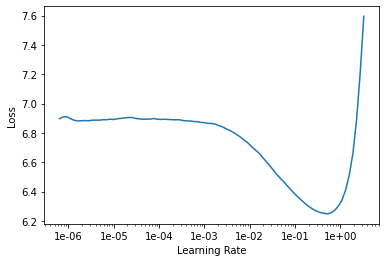

In [ ]:
learn.recorder.plot()

From the graph above, we could see that the best value for lr will be "1e-02". This is the point for the proper learning rate.

In [ ]:
moms = (0.8,0.7)
wd = 0.1
lr = 1.0E-02
learn.fit_one_cycle(1, lr, moms=moms, wd=wd)

epoch,train_loss,valid_loss,accuracy,time
0,5.467003,4.848189,0.179055,07:15


One cycle and cyclic momentum allows the model to be trained on higher learning rates and converge faster. The one cycle policy provides some form of regularisation.

In [ ]:
learn.unfreeze()

In [ ]:
learn.fit_one_cycle(3, lr, moms=moms, wd=wd)

epoch,train_loss,valid_loss,accuracy,time
0,4.829470,4.886715,0.173400,11:05
1,4.491278,4.359850,0.230804,11:13
2,3.943703,4.352107,0.239695,11:25


In [ ]:
learn.predict('This airline is frustrating', n_words=30)

'This airline is frustrating rights but do nt you should anticipate xxbos i shall say to my dad with the consolation airfare came thanks xxbos i have been on hold for minutes trying to'

If you can check the cell above, the model predicted the next 30 words in the text "This airline is frustrating". Good!

Now let's prepare the data for the classification model to classify the sentiments.

Now saving this encoder, later to be used for the classifier

In [ ]:
learn.save_encoder('1_enc')

Splitting the dataset into train, test and validation set.

In [ ]:
train_valid, test = train_test_split(dataset_ulmfit, test_size=0.1)
train, valid = train_test_split(train_valid, test_size=0.1)

***Preparing the data for the Classification Model***

In [ ]:
# Classifier model data
data_classifier = TextClasDataBunch.from_df(path,train_df=train, valid_df = valid,test_df = test, vocab=data_lm.train_ds.vocab, 
                                      text_cols='updated_text', label_cols='airline_sentiment', bs=48)

In [ ]:
data_classifier.show_batch()

text,target
xxbos i don t have a xxunk number i can t sent my mail to you via dm you re not following me i follow you now so you can sent me a dm,neutral
xxbos i don t like being lied to no bad weather in dc md va i ve been stuck in ca all day and should ve been home by now you owe me,negative
xxbos my hubby has a hr layover in dfw fm the cxl d flt pls help get him home sooner if you can any room on s by bwi or phl today,neutral
xxbos i booked lh via ua however at gate they rebooked me to a late flightr lh flight now that flight did nt earn pqd for me how do i get it,negative
xxbos i sure did i had to drive a total of hours to get my own bag i d like to explain that debacle but no one wants to talk to me,negative


***Building a classifier in the fine-tuned encoder we created***

In [ ]:
learn = text_classifier_learner(data_classifier, AWD_LSTM, drop_mult=0.5)
learn.load_encoder('1_enc')
learn.freeze()

To find the optimal lr value

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


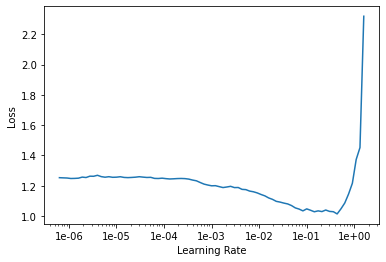

In [ ]:
learn.lr_find()
learn.recorder.plot()

Best lr value = 1e-03

In [ ]:
lr = 1.0E-03
learn.fit_one_cycle(1, lr, moms=moms, wd=wd)

epoch,train_loss,valid_loss,accuracy,time
0,0.745155,0.566392,0.804249,04:00


That was good increase in the accuracy. Look at the training loss and the validation loss. The validation loss is better than the training loss. That's a good point to note.

Let try with more epocs and check the results! Let's do one epoch at a time for the classifier training


In [ ]:
learn.freeze_to(-2)
lr /= 2
learn.fit_one_cycle(1, slice(lr/(2.6**4), lr), moms=moms, wd=wd)

epoch,train_loss,valid_loss,accuracy,time
0,0.687063,0.507331,0.817147,04:46


In [ ]:
learn.freeze_to(-3)
lr /= 2
learn.fit_one_cycle(1, slice(lr/(2.6**4), lr), moms=moms, wd=wd)

epoch,train_loss,valid_loss,accuracy,time
0,0.624351,0.533797,0.816388,07:46


In [ ]:
learn.unfreeze()
lr /= 5
learn.fit_one_cycle(2, slice(lr/(2.6**4), lr), moms=moms, wd=wd)

epoch,train_loss,valid_loss,accuracy,time
0,0.614632,0.509154,0.817906,12:35
1,0.614031,0.493305,0.828528,11:04


***That's was a pretty good accuracy. Now let's try to analyse the sentiment of a random text***


> **Neutral** - 1

> **Positive** - 2

> **Negative** - 0


In [ ]:
learn.predict('This wrost airline I have ever travelled')

(Category tensor(0), tensor(0), tensor([0.7012, 0.1897, 0.1090]))

Identified as the **Negative** sentiment

In [ ]:
learn.predict('The flight travel was excellent')

(Category tensor(2), tensor(2), tensor([0.1832, 0.1855, 0.6312]))

Identified as the **Positive** sentiment

In [ ]:
learn.predict('The flight to new york goes via Washington DC')

(Category tensor(1), tensor(1), tensor([0.2812, 0.5738, 0.1450]))

Identified as the **Neutral** sentiment

If you can check the above cells, the model is pretty good with its predictions.

Check for all the three use cases.

***Accuracy Score***

In [ ]:
interp = TextClassificationInterpretation.from_learner(learn)
acc = accuracy(interp.preds, interp.y_true)
print('Accuracy: {0:.3f}'.format(acc))

Accuracy: 0.829


The Accuracy is around **83%**. This is the best one!

***Confusion Matrix***

Text(0.5, 1.0, 'Classifation Confusion Matrix')

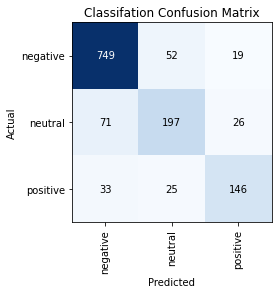

In [ ]:
interp.plot_confusion_matrix()
plt.title('Classifation Confusion Matrix')

Let's check where our model went wrong. 

In [ ]:
interp.show_top_losses(30)

Text,Prediction,Actual,Loss,Probability
xxbos when will there be wifi on the dca stl route hour flight could use some love,neutral,negative,4.86,0.01
xxbos troubling news time to raise the bar on legroom,neutral,negative,4.21,0.01
xxbos thank you,positive,neutral,3.49,0.03
xxbos believe me i understand flight was originally booked for sunday flight was cancelled flighted and rescheduled for today,negative,positive,3.43,0.03
xxbos okay thanks,positive,neutral,3.40,0.03
xxbos thanks,positive,neutral,3.09,0.05
xxbos you ve been officially xxunk by for better flight experience pleasant cabin crew and xxunk ua m switching,positive,negative,3.09,0.05
xxbos is expiring the offer to buy or transfer united mileageplus miles with discount many offers during a year,neutral,positive,3.01,0.05
xxbos i especially like how you upgraded three of your crew members to first class instead of passengers xxunk customerservice,negative,positive,3.00,0.05
xxbos hi flight if i try and book a new one way flight departure shows up as pm which seems accurate,neutral,positive,2.99,0.05


The model often misclassified the "neutral" tweets as "negative" and the "positive" tweets as "negative". 

It's not certainly clear for the reason behind these mislabeled tweets, but one possible thing would be the "contraction words". We can still build a model more suited to the vocabulary and style of language which is used in the tweets. If we get a larger corpus, then probably we can improve the model.

## **Conclusion & Results**



> The results prove that the best model is with ULMFiT with an accuracy score of **83% (82.9%)**

> Though the dataset was unbalanced, since it had a lot of negative reviews, when compared to positive and neutral reviews, the ULMFiT helped in predicting the sentiments very well.

> During the text cleaning phase, the special characters, usernames, emoji icons, URL's were removed. 

> We didn't apply lemmatization and stop words in the final code, because the accuracy score went low while doing so. The accuracy score was **77%**

> The accuracy score for the logistic regression was **80%**. However, the results of the precision and recall weren't very satisfying for the "Positive sentiment tweets" 

> Even the analysis with the **vadar method** weren't satisfying enough as you could see their results as well.

> Even with the best model "ULMFiT", it couldn't handle cases of **sarcasm**.


